# ***ASSIGNMENT 6***


# Download dataset and libraries

In [ ]:
# Download iris dataset and usual libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.columns)

df['Target'] = iris.target
df['Label'] = df.Target.replace(dict(enumerate(iris.target_names)))
Label_list = df['Label'].to_list()
print(Label_list)

print(df.info(verbose=True))
df.head()

# Encode the Label values to integer values

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# setosa -> 0
# versicolor -> 1
# virginica -> 2

flower_encoder = LabelEncoder()
y = flower_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


a. Checking the correlation between each columns

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


b. Checking for null values

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
Label                0
dtype: int64

c. Details on the count 

In [ ]:
df.shape
print("Total number of labels: {}".format(df.shape[0]))
print("Number of setosa: {}".format(df[df.Label == 'setosa'].shape[0]))
print("Number of versicolor: {}".format(df[df.Label == 'versicolor'].shape[0]))
print("Number of virginica: {}".format(df[df.Label == 'virginica'].shape[0]))

Total number of labels: 150
Number of setosa: 50
Number of versicolor: 50
Number of virginica: 50


 d. Dropping the duplicates

In [ ]:
df=df.drop_duplicates()

In [ ]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of setosa: {}".format(df[df.Label == 'setosa'].shape[0]))
print("Number of versicolor: {}".format(df[df.Label == 'versicolor'].shape[0]))
print("Number of virginica: {}".format(df[df.Label == 'virginica'].shape[0]))

Total number of labels: 149
Number of setosa: 50
Number of versicolor: 50
Number of virginica: 49


e. Plot the values in histogram for each feature

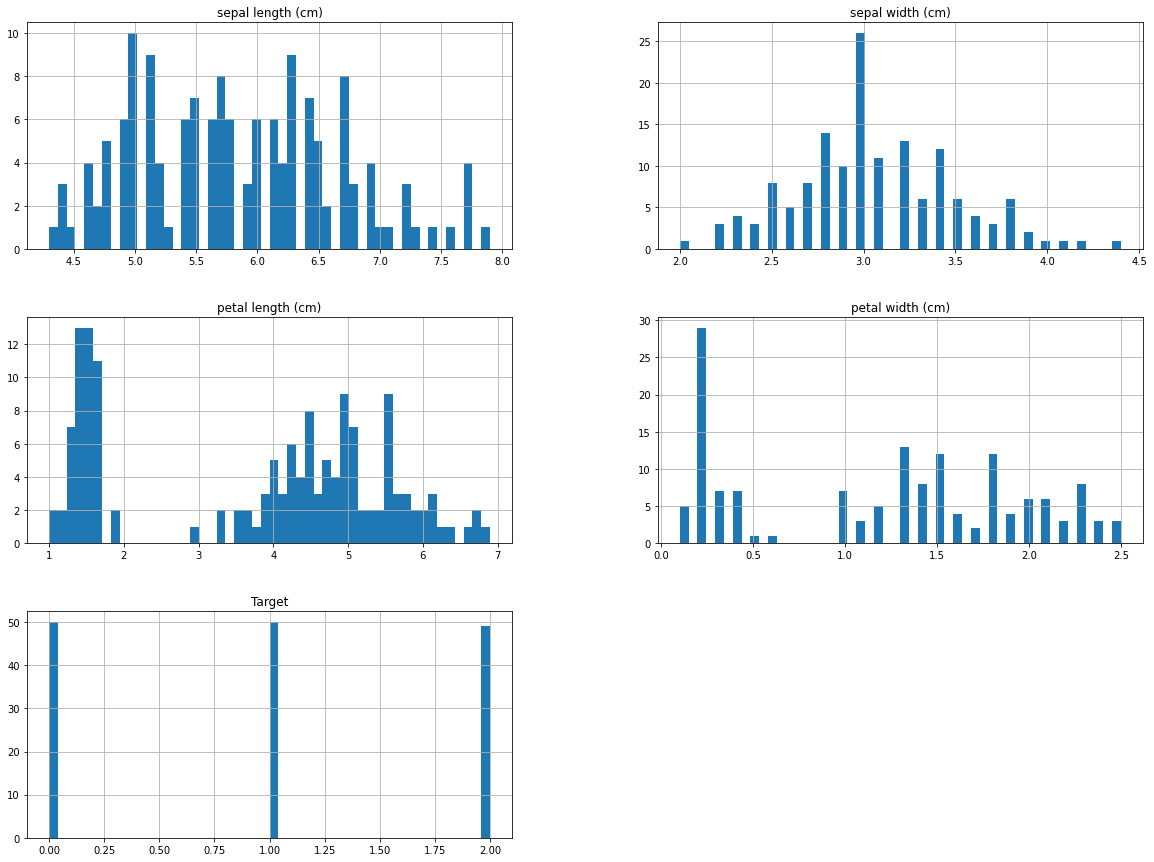

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

f. Pairplot of the features

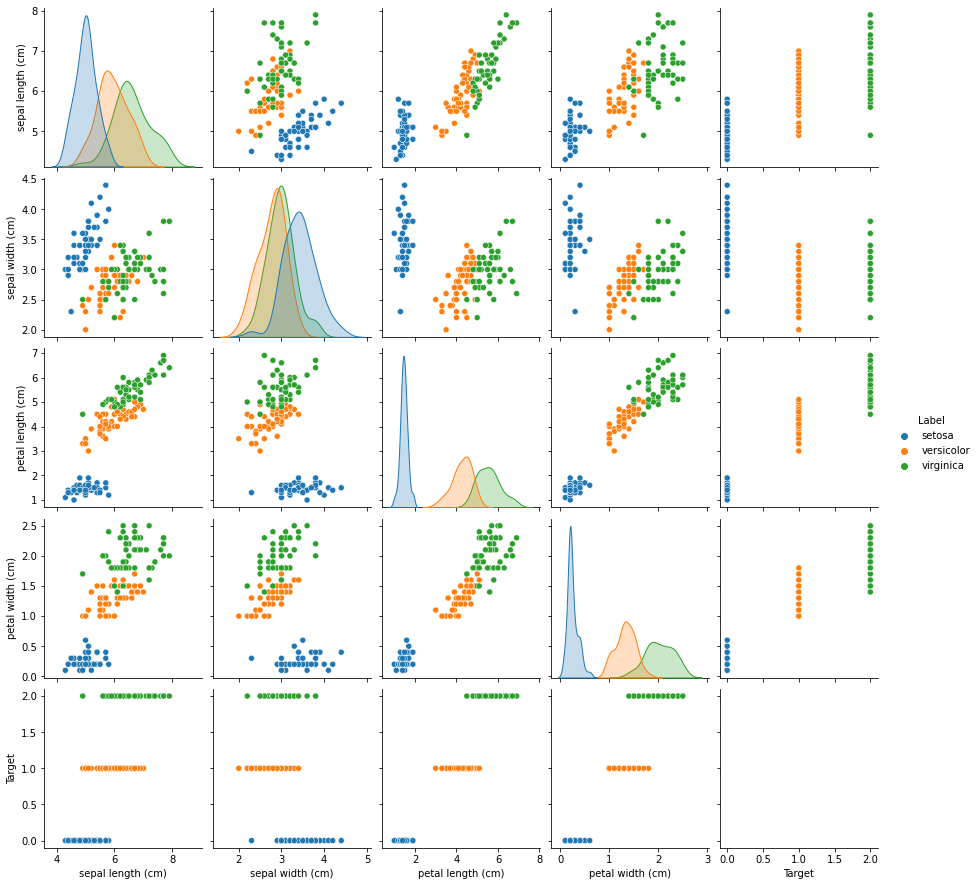

In [ ]:
sns.pairplot(df, hue = 'Label')

# Histplot 
a. SEPAL length - Histogram Plot

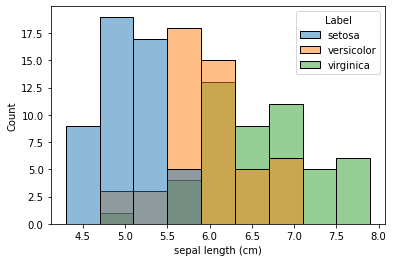

In [ ]:
sns.histplot(data=df, x="sepal length (cm)", hue="Label")

b. SEPAL width - Histogram Plot

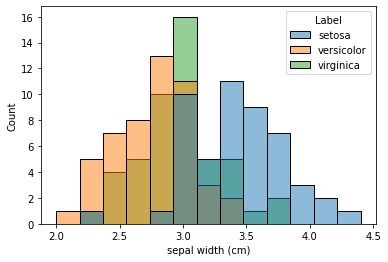

In [ ]:
sns.histplot(data=df, x="sepal width (cm)", hue="Label")

c. PETAL length - Histogram Plot

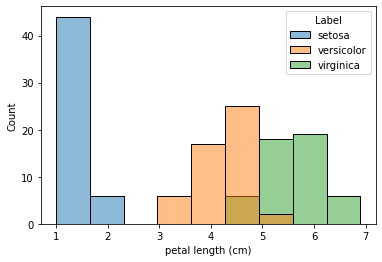

In [ ]:
sns.histplot(data=df, x="petal length (cm)", hue="Label")

d. PETAL width - Histogram Plot

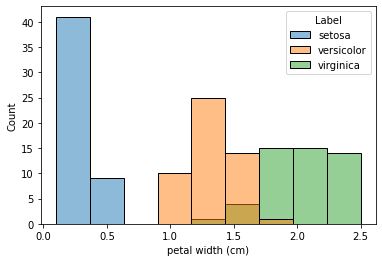

In [ ]:
sns.histplot(data=df, x="petal width (cm)", hue="Label")

# Use GMM to separate the clusters using all 4 features: 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



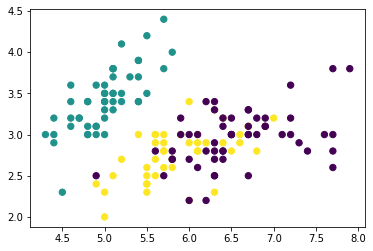

In [ ]:
# [Added step A] - Use GMM to separate the clusters using all 4 features: 
# petal length & width, and sepal length & width. 
# Map each cluster to a class by picking the most common class for each cluster (using the scipy.stats.mode() function): 
gmm = GaussianMixture(n_components=3).fit(iris.data)
gmm_labels = gmm.predict(iris.data)
print(gmm_labels)
print()
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=gmm_labels, s=40, cmap='viridis');

# Calculate the average of the cluser


In [ ]:
# [Added step B] - Report value of np.sum(y_pred==y) / len(y_pred)
np.sum(gmm_labels)/len(gmm_labels)

0.9333333333333333

# Create Blobs

In [ ]:
# [Added step C] - Generate blobs from a new dataset, use “ from sklearn.datasets import make_blobs” . 
Use the following parameters:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y_true = make_blobs(n_samples=2000, centers=blob_centers,
                       cluster_std=blob_std, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
plt.title('Blobs Generated')
plt.scatter(X[:, 0], X[:, 1], c=y_true, edgecolor='m',cmap='viridis')

# Plot the blobs
plt.show()

# K-Means Training on the new dataset

Text(0.5, 1.0, 'Predicted values')

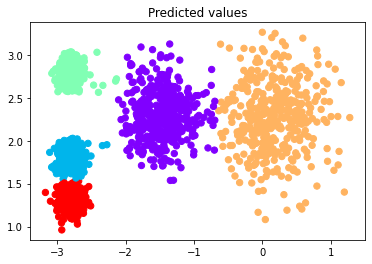

In [ ]:
# Train k-means to train on this dataset
from sklearn.cluster import KMeans
X = X[:, ::-1]
kmeans = KMeans(5, random_state=0)
y_pred = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='rainbow');
plt.title('Predicted values for k = 5')

In [ ]:
# Print the value of the centroids
kmeans.cluster_centers_

array([[-1.46332098,  2.31083369],
       [-2.80446936,  1.79959228],
       [-2.80180006,  2.79464334],
       [ 0.17864202,  2.27506362],
       [-2.80379109,  1.30017997]])

In [ ]:
kmeans.inertia_

210.90540191468097

# Prediction of value for the given input

In [ ]:
# Given X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]), predict labels of new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
y_pred1 = kmeans.predict(X_new)
print(y_pred1)

[3 3 2 2]


# VORNOI PLOT

Text(0.5, 1.0, 'Vornoi plot with the Centroids')

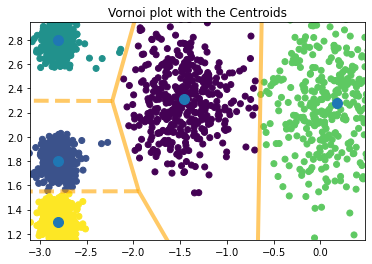

In [ ]:
# Plot model’s decision boundaries using data, centroids,decision boundaries. 
# Result should be a voronoi_plot

from scipy.spatial import Voronoi, voronoi_plot_2d
points = kmeans.cluster_centers_
X = X[:, ::-1]
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=4, line_alpha=0.6, point_size=20)
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap="viridis")
plt.title('Vornoi plot with the Centroids')

# Values of k = 3 and k = 8

**Value of K = 3** 




Text(0.5, 1.0, 'Predicted values')

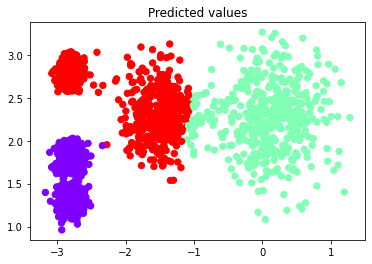

In [ ]:
# Set values of k = 3 and k = 8, explain your results in both cases by means of the resultant intertia
kmeans_3 = KMeans(3, random_state=0)
y_pred = kmeans_3.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='rainbow');
plt.title('Predicted values for k = 3')

In [ ]:
# Center of the clusters
kmeans_3.cluster_centers_

array([[-2.8047944 ,  1.55187579],
       [ 0.0771363 ,  2.27284941],
       [-2.19950674,  2.56899558]])

In [ ]:
# Inertia for k = 3
kmeans_3.inertia_

646.230269055688

**Value of K = 8**

Text(0.5, 1.0, 'Predicted values for k = 8')

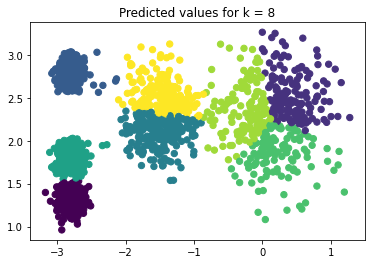

In [ ]:
# KMeans for the k-value 8
kmeans_8 = KMeans(8, random_state=0)
y_pred = kmeans_8.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis');
plt.title('Predicted values for k = 8')

In [ ]:
kmeans_8.cluster_centers_

array([[-2.80379109,  1.30017997],
       [ 0.45250828,  2.54613863],
       [-2.80180006,  2.79464334],
       [-1.5082377 ,  2.09242716],
       [-2.80446936,  1.79959228],
       [ 0.25058291,  1.82394229],
       [-0.25149154,  2.36917719],
       [-1.46432948,  2.54557934]])

In [ ]:
kmeans_8.inertia_

121.54698628667417

# Set values of k = 3 and k = 8, explain your results in both cases by means of the resultant intertia

**Inertia measures how well a dataset was clustered by K-Means. 
It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

1.   From the above 2 points we can see that the inertia for *k = 3 is 646.230 and k = 8 is 121.54*.

2.   From this we can find that the clustering is done well in case of higher number of clusters, that is if there are multiple categories.

# Inertia function plot for 

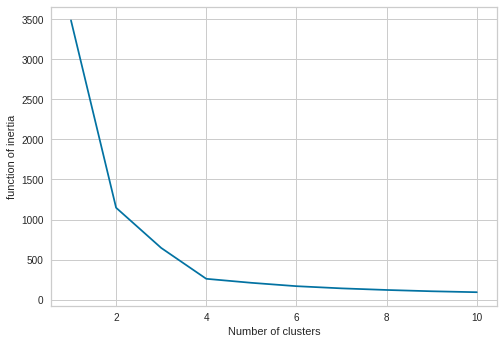

In [ ]:
# plot the inertia as a function of k and analyze the resulting curve, show plots
wcss = [] 
clust_numbers = [1,2,3,4,5,6,7,8,9,10]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(clust_numbers, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('function of inertia') 
plt.show()


# What is the value of k at elbow

**The elbow point here is found to be at k = 4 after which the graph runs almost parallel to the x-axis**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=array([[ 1.27848962,  2.27043013],
       [-2.79898145,  2.01982963],
       [-2.75336204,  1.79056075],
       ...,
       [-0.06342119,  2.09430641],
       [ 0.57180204,  2.53288984],
       [-1.18229182,  1.99323068]]),
                 k=None, metric=None, model=None, timings=True)

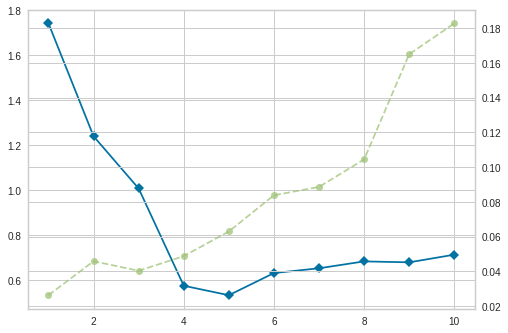

In [ ]:
# Alternate method for plotting the Inertia
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X)
elbow.KElbowVisualizer(model, X, y=None, k=10, metric='distortion', timings=True, locate_elbow=True, show=True)

The value of elbow in this alternate graph is found to be 5 after which there is a slight change in the graph direction.